<a href="https://colab.research.google.com/github/curry2004/Copula-Based/blob/main/Copulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import scipy.stats as stats

In [ ]:
stocks=['AAPL','GOOGL','TSLA','UNH','MSFT','AMZN','NVDA','CINF','PG','V','HD','JNJ','RTX']
stock_returns={}
for stock in stocks:
    a=yf.download(stock,start='2021-01-01',end='2023-01-01')
    dates=a.index
    stock_returns[stock]=(a['Adj Close'].pct_change().dropna())

reference_asset=yf.download('^IXIC',start='2021-01-01',end='2023-01-01')
refret=(reference_asset['Adj Close'].pct_change().dropna())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
srana={}
refana={}
for stock in stocks:
    srana[stock]= stock_returns[stock]['2021-01-01':'2022-01-01']
refana=refret['2021-01-01':'2022-01-01']

In [ ]:
coeffs=[]
for stock in stocks:
    x=sm.add_constant(srana[stock])
    model=sm.OLS(refana,x)
    results=model.fit()
    coeffs.append(results.params[1])
coeffs

[0.5525135622056513,
 0.5318700068341532,
 0.20893125248541555,
 0.2112071745134619,
 0.6712697316478304,
 0.5152165201071632,
 0.2916267683886267,
 0.17394753894484816,
 0.10461726852443316,
 0.3125187895391717,
 0.35879472461061773,
 0.19419390121494357,
 0.32304636259366637]

In [ ]:
spreads={}
for i,stock in enumerate(stocks):
    spreads[stock]=refana-coeffs[i]*srana[stock]
pd.DataFrame(spreads)

,AAPL,GOOGL,TSLA,UNH,MSFT,AMZN,NVDA,CINF,PG,V,HD,JNJ,RTX
Date,,,,,,,,,,,,,
2021-01-05,0.002659,0.005201,0.007961,0.012330,0.008843,0.004336,0.003013,0.011137,0.008822,0.014154,0.006595,0.007207,0.004817
2021-01-06,0.012501,-0.000850,-0.012030,-0.014962,0.011308,0.006729,0.011094,-0.014286,-0.007199,-0.003344,-0.008148,-0.007925,-0.010100
2021-01-07,0.006788,0.009755,0.009042,0.022255,0.006539,0.021737,0.008776,0.025562,0.026619,0.023892,0.027398,0.024985,0.027940
2021-01-08,0.005524,0.003251,-0.006088,0.011242,0.006203,0.006946,0.011762,0.010094,0.010338,0.007896,0.006479,0.010692,0.009922
2021-01-11,0.000305,-0.000251,0.003802,-0.011005,-0.006029,-0.001453,-0.020112,-0.014303,-0.011831,-0.008826,-0.015393,-0.011727,-0.012262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.001226,0.010336,0.008644,0.012163,-0.001644,0.018133,0.001080,0.011163,0.012698,0.012462,0.007576,0.012281,0.012626
2021-12-28,-0.002455,-0.001256,-0.004597,-0.007096,-0.003289,-0.008652,0.000229,-0.006724,-0.006204,-0.006245,-0.007533,-0.006420,-0.008598
2021-12-29,-0.001260,-0.000866,-0.000544,-0.002091,-0.002359,0.003425,0.002105,-0.001270,-0.001849,-0.001154,-0.005063,-0.002350,-0.000494


In [ ]:
def spread(returns,refret):
    x=sm.add_constant(returns)
    model=sm.OLS(refret,x)
    results=model.fit()
    coeff=(results.params[1])
    return refret-coeff*returns

In [ ]:
co={}
tau={}
for s1 in stocks:
    for s2 in stocks:
        if((s1!=s2) and (f'{s2}-{s1}' not in co.keys())):
            co[f'{s1}-{s2}']=coint(spreads[s1],spreads[s2],maxlag=1)[1]

            tau[f'{s1}-{s2}']=stats.kendalltau(spreads[s1],spreads[s2])[0]

In [ ]:
tau

{'AAPL-GOOGL': 0.33941035856573704,
 'AAPL-TSLA': 0.2851633466135458,
 'AAPL-UNH': 0.447011952191235,
 'AAPL-MSFT': 0.39773705179282864,
 'AAPL-AMZN': 0.394804780876494,
 'AAPL-NVDA': 0.28427091633466134,
 'AAPL-CINF': 0.41775298804780875,
 'AAPL-PG': 0.45453386454183264,
 'AAPL-V': 0.4023266932270916,
 'AAPL-HD': 0.4375139442231075,
 'AAPL-JNJ': 0.4507729083665338,
 'AAPL-RTX': 0.3633784860557769,
 'GOOGL-TSLA': 0.30435059760956173,
 'GOOGL-UNH': 0.5423107569721115,
 'GOOGL-MSFT': 0.4649880478087649,
 'GOOGL-AMZN': 0.4591235059760955,
 'GOOGL-NVDA': 0.32882868525896414,
 'GOOGL-CINF': 0.5015776892430278,
 'GOOGL-PG': 0.5432031872509959,
 'GOOGL-V': 0.5088446215139442,
 'GOOGL-HD': 0.46435059760956165,
 'GOOGL-JNJ': 0.5371474103585657,
 'GOOGL-RTX': 0.4463107569721115,
 'TSLA-UNH': 0.5315378486055776,
 'TSLA-MSFT': 0.25214342629482067,
 'TSLA-AMZN': 0.36803187250996017,
 'TSLA-NVDA': 0.3384541832669323,
 'TSLA-CINF': 0.5581195219123505,
 'TSLA-PG': 0.5785816733067729,
 'TSLA-V': 0.4540

In [ ]:
tausort=sorted(tau.items(),key=lambda x:x[1],reverse=True)
tausort

[('PG-JNJ', 0.9096733067729084),
 ('UNH-PG', 0.8593784860557768),
 ('UNH-JNJ', 0.8447808764940238),
 ('CINF-PG', 0.8364940239043823),
 ('CINF-JNJ', 0.8232988047808764),
 ('UNH-CINF', 0.8115059760956174),
 ('CINF-RTX', 0.7614023904382469),
 ('PG-V', 0.7316972111553784),
 ('PG-HD', 0.7302948207171314),
 ('PG-RTX', 0.7262788844621513),
 ('UNH-HD', 0.726215139442231),
 ('UNH-V', 0.7259601593625498),
 ('HD-JNJ', 0.7236015936254979),
 ('CINF-HD', 0.7185019920318725),
 ('V-JNJ', 0.7181195219123505),
 ('JNJ-RTX', 0.710406374501992),
 ('UNH-RTX', 0.7091952191235059),
 ('CINF-V', 0.7049880478087649),
 ('V-RTX', 0.6828685258964143),
 ('HD-RTX', 0.6413067729083665),
 ('V-HD', 0.6362709163346613),
 ('TSLA-PG', 0.5785816733067729),
 ('TSLA-CINF', 0.5581195219123505),
 ('TSLA-JNJ', 0.5534023904382469),
 ('AMZN-PG', 0.5501513944223108),
 ('GOOGL-PG', 0.5432031872509959),
 ('GOOGL-UNH', 0.5423107569721115),
 ('GOOGL-JNJ', 0.5371474103585657),
 ('TSLA-UNH', 0.5315378486055776),
 ('AMZN-JNJ', 0.530199203

In [ ]:
done=[]
selected=[]
i=0
while True:
    a,b=tausort[i][0].split('-')
    if (a not in done and b not in done):
        done.append(a)
        done.append(b)
        selected.append(f'{a}-{b}')
    i+=1
    if(len(done)==12):
        break
selected

['PG-JNJ', 'UNH-CINF', 'V-RTX', 'TSLA-HD', 'GOOGL-MSFT', 'AAPL-AMZN']

In [ ]:
marginals= pd.DataFrame(index=stocks, columns=['Distribution', 'AIC', 'BIC'])

for stock in stocks:
    data = spreads[stock]
    dists = ['Normal', "Student's t", 'Cauchy']
    best_aic = np.inf
    for dist,name in zip([stats.norm, stats.t, stats.cauchy], dists):
        params = dist.fit(data)
        dist_fit = dist(*params)
        log_like = np.log(dist_fit.pdf(data)).sum()
        aic = 2*len(params) - 2 * log_like
        if aic<best_aic:
            best_dist = name
            best_aic = aic
            best_bic = len(params) * np.log(len(data)) - 2 * log_like
    marginals.loc[stock] = [best_dist, best_aic, best_bic]

In [ ]:
marginals

,Distribution,AIC,BIC
AAPL,Student's t,-1765.877549,-1755.30119
GOOGL,Student's t,-1742.558637,-1731.982278
TSLA,Normal,-1664.407626,-1657.35672
UNH,Student's t,-1553.146367,-1542.570008
MSFT,Student's t,-1779.50685,-1768.930492
AMZN,Normal,-1695.595681,-1688.544776
NVDA,Student's t,-1730.490045,-1719.913686
CINF,Student's t,-1556.048606,-1545.472247
PG,Student's t,-1542.690018,-1532.113659
V,Student's t,-1590.994235,-1580.417876


In [ ]:
pif_pair={}
for pair in selected:
    a,b=pair.split('-')
    s1=spreads[a]
    s2=spreads[b]
    params_s1 = stats.t.fit(s1)
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(s2)
    dist_s2 = stats.t(*params_s2)
    u= dist_s1.cdf(s1)
    v= dist_s2.cdf(s2)
    X=np.vstack([u,v])
    pif_pair[pair]=X

In [ ]:
from copulas import *

In [ ]:
copulas_df = pd.DataFrame( columns=['copula', 'parameter', 'aic', 'bic'])
for pair in selected:

    best_aic = np.inf
    for copula in [GumbelCopula(),ClaytonCopula(),EFGMCopula(alpha=0)]:
            copula.fit(pif_pair[pair][0],pif_pair[pair][1])
            L = copula.log_likelihood(pif_pair[pair][0],pif_pair[pair][1])
            aic = 2 - 2 * L
            if aic < best_aic:
                best_aic = aic
                best_bic =np.log(len(u)) - 2 * L
                best_copula = copula.name
                if isinstance(copula,  EFGMCopula):
                    best_param = copula.alpha
                elif isinstance(copula,  ArchimedeanCopula):
                    best_param = copula.alpha
                else:
                    best_param = copula.rho
    copulas_df.loc[pair] = [best_copula, best_param, best_aic, best_bic]
copulas_df

/content/copulas.py:28: RuntimeWarning:

divide by zero encountered in log

/content/copulas.py:28: RuntimeWarning:

invalid value encountered in log

/content/copulas.py:28: RuntimeWarning:

invalid value encountered in log



,copula,parameter,aic,bic
PG-JNJ,Gumbel,11.320279,-997.529113,-994.003660
UNH-CINF,Gumbel,5.131049,-607.043698,-603.518245
V-RTX,Gumbel,2.978605,-350.938573,-347.413120
TSLA-HD,Gumbel,1.909837,-154.774330,-151.248877
GOOGL-MSFT,Gumbel,1.838732,-141.054661,-137.529208
AAPL-AMZN,Gumbel,1.593732,-88.890125,-85.364672


In [ ]:
def probs(ret1,ret2,refret,fit_period,pred_period,prob_s1,prob_s2,start,end):
    tot_period=fit_period+pred_period

    s1=spread(ret1[:fit_period],refret[:fit_period])
    print(s1)
    s2=spread(ret2[:fit_period],refret[:fit_period])
    s1p=spread(ret1[fit_period:tot_period],refret[fit_period:tot_period])
    print(s1p)
    s2p=spread(ret2[fit_period:tot_period],refret[fit_period:tot_period])
    params_s1 = stats.t.fit(s1)
    dist_s1 = stats.t(*params_s1)
    params_s2 = stats.t.fit(s2)
    dist_s2 = stats.t(*params_s2)
    u = dist_s1.cdf(s1)
    v = dist_s2.cdf(s2)
    copulas = GaussianCopula()
    copulas.fit(u,v)
    for u,v in zip(dist_s1.cdf(s1p), dist_s2.cdf(s2p)):
        print (u,v)
        prob_s1.append(copulas.cdf_u_given_v(u,v))
        prob_s2.append(copulas.cdf_v_given_u(u,v))
    return pd.DataFrame({'p1':prob_s1,'p2':prob_s2},index=refret.index[-len(prob_s1)-1:-1])

In [ ]:
starttest='2021-01-01'
endtest='2023-01-01'

In [ ]:
len(stock_returns[a][starttest:endtest])

251

In [ ]:
len(refret[starttest:endtest])


502

In [ ]:
a

'PG'

In [ ]:
len(refret[starttest:'2022-01-01'])

251

In [ ]:
probdfs={}
for pair in selected:
    a,b=pair.split('-')

    probs_s1=[]
    probs_s2=[]
    probdfs[pair]=probs(stock_returns[a][starttest:endtest],stock_returns[b][starttest:endtest],refret[starttest:endtest],fit_period=251,pred_period=251,prob_s1=probs_s1,prob_s2=probs_s2,start=starttest,end=endtest)

Date
2021-01-05    0.008822
2021-01-06   -0.007199
2021-01-07    0.026619
2021-01-08    0.010338
2021-01-11   -0.011831
                ...   
2021-12-27    0.012698
2021-12-28   -0.006204
2021-12-29   -0.001849
2021-12-30   -0.000659
2021-12-31   -0.006657
Name: Adj Close, Length: 251, dtype: float64
Date
2022-01-03    0.014503
2022-01-04   -0.015371
2022-01-05   -0.036168
2022-01-06    0.003770
2022-01-07   -0.009280
                ...   
2022-12-23    0.000378
2022-12-27   -0.019013
2022-12-28   -0.005751
2022-12-29    0.023436
2022-12-30    0.002947
Name: Adj Close, Length: 251, dtype: float64
0.898774723679812 0.8268624473435424
0.06132251346462076 0.09810452662739354
0.0041911547200157336 0.004246228328420721
0.6021316048646415 0.4693459034971667
0.14644950772565812 0.045045029335663664
0.7740536767253337 0.5820254687039537
0.960504888324227 0.9557537616460916
0.4863291717617167 0.7311100993117592
0.02278823385434087 0.024793747059139955
0.4495883504040177 0.787786379442484
0.07

In [ ]:
probdfs

{'PG-JNJ':                   p1        p2
 Date                          
 2021-12-31  0.992450  0.010955
 2022-01-03  0.029672  0.952087
 2022-01-04  0.466673  0.484426
 2022-01-05  0.990924  0.009227
 2022-01-06  1.000000  0.000000
 ...              ...       ...
 2022-12-22  0.444854  0.549786
 2022-12-23  0.004833  0.990545
 2022-12-27  0.999801  0.000161
 2022-12-28  0.607117  0.496050
 2022-12-29  0.812451  0.192392
 
 [251 rows x 2 columns],
 'UNH-CINF':                   p1        p2
 Date                          
 2021-12-31  0.202116  0.880010
 2022-01-03  1.000000  0.000000
 2022-01-04  0.136917  0.657876
 2022-01-05  1.000000  0.000000
 2022-01-06  1.000000  0.000000
 ...              ...       ...
 2022-12-22  0.261617  0.706810
 2022-12-23  0.336227  0.493587
 2022-12-27  0.106716  0.838026
 2022-12-28  0.905485  0.223111
 2022-12-29  0.002157  0.997917
 
 [251 rows x 2 columns],
 'V-RTX':                   p1        p2
 Date                          
 2021-12-31  0.0158

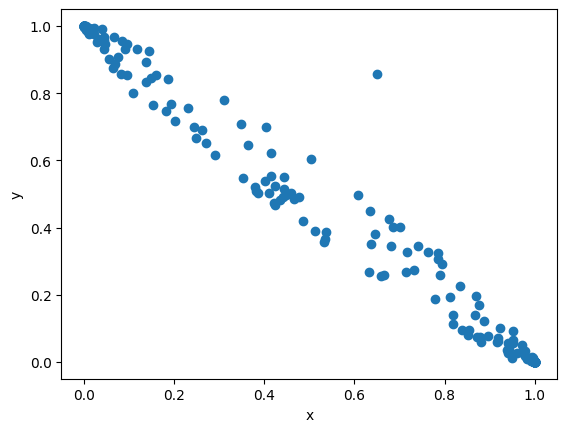

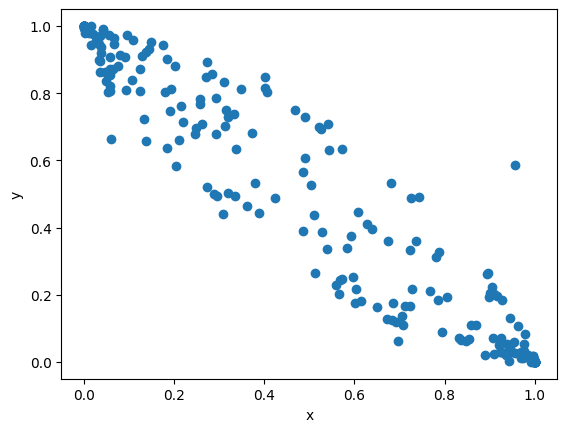

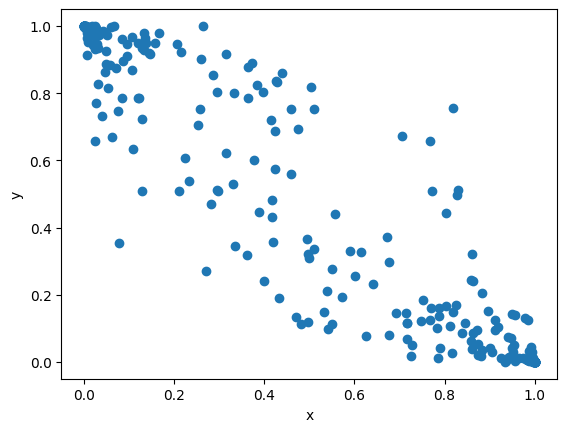

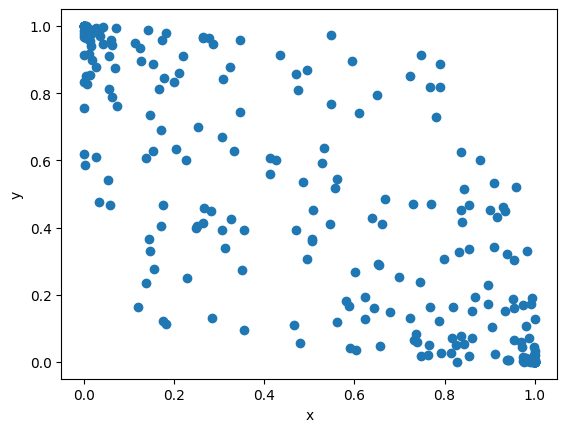

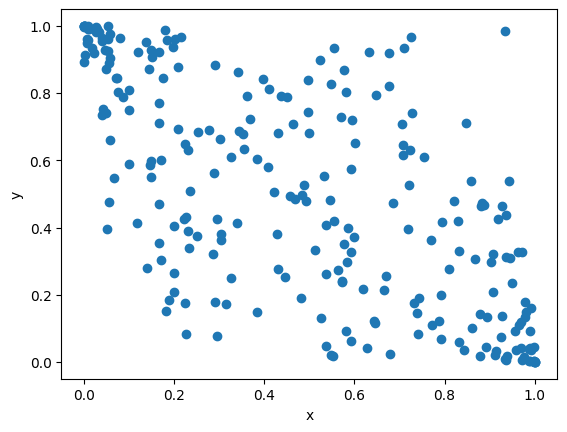

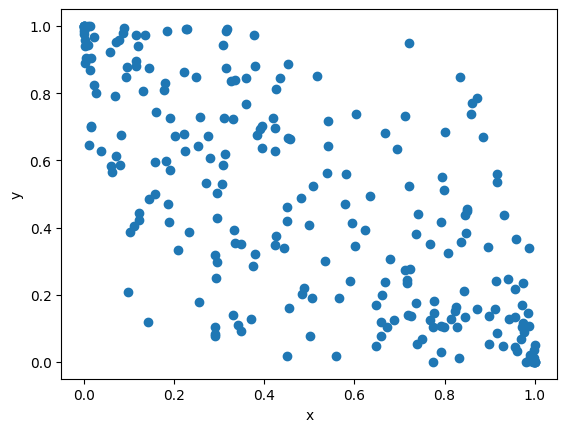

In [ ]:
for pair in selected:
    a,b=pair.split('-')
    plt.scatter(probdfs[pair].iloc[:,0],probdfs[pair].iloc[:,1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [ ]:
def pair_strategy(probs_trade,cl,cl_close):
    '''
    conduct pairs trading based on conditional probability
    '''
    s1 = probs_trade.columns[0]
    s2 = probs_trade.columns[1]
    positions = pd.DataFrame(index=probs_trade.index, columns=probs_trade.columns)
    longa = False
    short = False
    for t in positions.index:
        # if long position is open
        if longa:
            if (probs_trade.loc[t][s1] > (1-cl_close)) or (probs_trade.loc[t][s2] < cl_close):
                positions.loc[t] = [0,0]
                longa = False
            else:
                positions.loc[t] = [1,-1]

        # if short position is open
        elif short:
            if (probs_trade.loc[t][s1] < cl_close) or (probs_trade.loc[t][s2] > (1-cl_close)):
                positions.loc[t] = [0,0]
                short = False
            else:
                positions.loc[t] = [-1,1]

        # if no positions are open
        else:
            if (probs_trade.loc[t][s1] < (1-cl)) and (probs_trade.loc[t][s2] > cl):
                # open long position
                positions.loc[t] = [1,-1]
                longa = True
            elif (probs_trade.loc[t][s1] > cl) and (probs_trade.loc[t][s2] < (1-cl)):
                # open short positions
                positions.loc[t] = [-1,1]
                short = True
            else:
                positions.loc[t] = [0,0]
    return positions

In [ ]:
selected.remove("AAPL-AMZN")

In [ ]:
probs={}
for pair in selected:
    a,b=pair.split('-')
    probs[a]=probdfs[pair].iloc[:,0]
    probs[b]=probdfs[pair].iloc[:,1]
pro=pd.DataFrame(probs)


In [ ]:
pro.to_csv('probs.csv')

In [ ]:
probdf=pd.read_csv('probs.csv')

In [ ]:
positions={}
for i,pair in enumerate(selected):
    y={}
    a,b=pair.split('-')
    y[a]=probdf.iloc[:,(2*i+1)]
    y[b]=probdf.iloc[:,(2*i+2)]
    x=pair_strategy(probdf.iloc[:,(2*i+1):(2*i+3)],0.95,0.95)
    positions[a]=x.iloc[:,0]
    positions[b]=x.iloc[:,1]
positions

{'PG': 0      -1
 1       0
 2       0
 3      -1
 4      -1
        ..
 246     0
 247     1
 248     0
 249     0
 250     0
 Name: PG, Length: 251, dtype: object,
 'JNJ': 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 246     0
 247    -1
 248     0
 249     0
 250     0
 Name: JNJ, Length: 251, dtype: object,
 'UNH': 0       0
 1      -1
 2       0
 3      -1
 4      -1
        ..
 246     0
 247     0
 248     0
 249     0
 250     1
 Name: UNH, Length: 251, dtype: object,
 'CINF': 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 246     0
 247     0
 248     0
 249     0
 250    -1
 Name: CINF, Length: 251, dtype: object,
 'V': 0       1
 1       0
 2       0
 3       0
 4      -1
        ..
 246     0
 247     0
 248     0
 249     0
 250     0
 Name: V, Length: 251, dtype: object,
 'RTX': 0      -1
 1       0
 2       0
 3       0
 4       1
        ..
 246     0
 247     0
 248     0
 249     0
 250     0
 Name: RTX, Length: 251, dtype: obje

In [ ]:
x=pd.DataFrame(positions )
x.to_csv('positions.csv')
x

,PG,JNJ,UNH,CINF,V,RTX,TSLA,HD,GOOGL,MSFT,AAPL,AMZN
0,-1,1,0,0,1,-1,1,-1,0,0,0,0
1,0,0,-1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,-1,1,-1,1,0,0,0,0,0,0,0,0
4,-1,1,-1,1,-1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,0,0,0,0,0,0,0,0,0,0,0,0
247,1,-1,0,0,0,0,-1,1,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,-1,1
249,0,0,0,0,0,0,1,-1,0,0,0,0


In [ ]:
!pip install numpy==1.24.1

  Using cached numpy-1.24.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.1 which is incompatible.


In [ ]:
!pip install vectorbt

  Using cached numba-0.56.4-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
rmm-cu12 24.4.0 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.


In [ ]:
import vectorbt as vbt
import pandas as pd

In [ ]:
!pip install --upgrade numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vectorbt 0.26.1 requires numba<0.57.0,>=0.56.0; python_version >= "3.10" and python_version < "3.11", but you have numba 0.60.0 which is incompatible.


In [ ]:
position=pd.read_csv('positions.csv')#contains the positions that have to be taken the next day


In [ ]:
adjclose={}
for stock in stocks:
    a=yf.download(stock,start='2018-01-01',end='2023-01-01')
    dates=a.index
    adjclose[stock]=(a['Adj Close'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
position.shape

(251, 13)

In [ ]:
posi={}
#putting the entry points and exit points for use in vectorbt
for stock in position.columns[1:]:
    entries=[0]*251
    exits=[0]*251
    sentries=[0]*251
    sexits=[0]*251
    pos=position[stock]
    longt=False
    short=False
    for i in range(0,len(pos)):
        if(longt==False):
            if(pos[i]==1):
                entries[i]=1
                longt=True
        elif(longt==True):
            if(pos[i]==0):
                exits[i]=1
                longt=False
        if(short==False):
            if(pos[i]==-1):
                sentries[i]=1
                short=True
        elif(short==True):
            if(pos[i]==0):
                sexits[i]=1
                short=False
    posi[stock]=[(entries),(exits),(sentries),(sexits)]




In [ ]:
pfs={}
for stock in position.columns[1:]:
    pfs[stock] = vbt.Portfolio.from_signals(adjclose[stock]['2022-01-04':'2022-12-30'],posi[stock][0][:-1],posi[stock][1][0:-1],posi[stock][2][:-1],posi[stock][3][:-1],init_cash=10000,freq='1D')
    print(stock)
    print(pfs[stock].stats())
    pfs[stock].plot().show()

PG
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                  10405.338888
Total Return [%]                               4.053389
Benchmark Return [%]                          -4.984072
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              19.721871
Max Drawdown Duration                 173 days 00:00:00
Total Trades                                         77
Total Closed Trades                                  77
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                   59.74026
Best Trade [%]                                 3.362484
Worst Trade [%]                              

JNJ
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                   11409.73483
Total Return [%]                              14.097348
Benchmark Return [%]                           5.968677
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              12.799917
Max Drawdown Duration                 146 days 00:00:00
Total Trades                                         77
Total Closed Trades                                  77
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  49.350649
Best Trade [%]                                 5.006095
Worst Trade [%]                             

UNH
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                  10338.840578
Total Return [%]                               3.388406
Benchmark Return [%]                           9.384787
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              11.850142
Max Drawdown Duration                 246 days 00:00:00
Total Trades                                         64
Total Closed Trades                                  64
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                      56.25
Best Trade [%]                                 4.092392
Worst Trade [%]                             

CINF
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                   8746.984782
Total Return [%]                             -12.530152
Benchmark Return [%]                          -9.330733
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              19.310516
Max Drawdown Duration                 222 days 00:00:00
Total Trades                                         64
Total Closed Trades                                  64
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                    57.8125
Best Trade [%]                                 2.516959
Worst Trade [%]                            

V
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                  11236.032924
Total Return [%]                              12.360329
Benchmark Return [%]                          -5.901473
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              10.839885
Max Drawdown Duration                 137 days 00:00:00
Total Trades                                         57
Total Closed Trades                                  57
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  57.894737
Best Trade [%]                                10.599081
Worst Trade [%]                               

RTX
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                   8980.380251
Total Return [%]                             -10.196197
Benchmark Return [%]                          14.734487
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              16.636752
Max Drawdown Duration                 166 days 00:00:00
Total Trades                                         57
Total Closed Trades                                  57
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  45.614035
Best Trade [%]                                 3.935544
Worst Trade [%]                             

TSLA
Start                         2022-01-04 00:00:00
End                           2022-12-30 00:00:00
Period                          250 days 00:00:00
Start Value                               10000.0
End Value                             7393.680055
Total Return [%]                       -26.063199
Benchmark Return [%]                   -67.854625
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        33.794269
Max Drawdown Duration           249 days 00:00:00
Total Trades                                   55
Total Closed Trades                            54
Total Open Trades                               1
Open Trade PnL                                0.0
Win Rate [%]                            44.444444
Best Trade [%]                          11.408853
Worst Trade [%]                        -12.184122
Avg Winning Trade [%]                    3.691034
Avg Losing Trade [%]                    -3.74

HD
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                   8792.999901
Total Return [%]                             -12.070001
Benchmark Return [%]                         -21.566079
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              15.742221
Max Drawdown Duration                 237 days 00:00:00
Total Trades                                         55
Total Closed Trades                                  54
Total Open Trades                                     1
Open Trade PnL                                      0.0
Win Rate [%]                                  40.740741
Best Trade [%]                                 5.777452
Worst Trade [%]                              

GOOGL
Start                               2022-01-04 00:00:00
End                                 2022-12-30 00:00:00
Period                                250 days 00:00:00
Start Value                                     10000.0
End Value                                   9768.384523
Total Return [%]                              -2.316155
Benchmark Return [%]                         -38.898676
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               7.237472
Max Drawdown Duration                  82 days 00:00:00
Total Trades                                         31
Total Closed Trades                                  31
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                   54.83871
Best Trade [%]                                 3.723346
Worst Trade [%]                           

MSFT
Start                         2022-01-04 00:00:00
End                           2022-12-30 00:00:00
Period                          250 days 00:00:00
Start Value                               10000.0
End Value                            10534.263277
Total Return [%]                         5.342633
Benchmark Return [%]                   -26.425597
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        11.068854
Max Drawdown Duration           191 days 00:00:00
Total Trades                                   31
Total Closed Trades                            31
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            51.612903
Best Trade [%]                           4.355473
Worst Trade [%]                           -4.1812
Avg Winning Trade [%]                    1.659175
Avg Losing Trade [%]                    -1.38

AAPL
Start                         2022-01-04 00:00:00
End                           2022-12-30 00:00:00
Period                          250 days 00:00:00
Start Value                               10000.0
End Value                             8224.413129
Total Return [%]                       -17.755869
Benchmark Return [%]                   -27.276519
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         21.02671
Max Drawdown Duration           160 days 00:00:00
Total Trades                                   27
Total Closed Trades                            27
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            40.740741
Best Trade [%]                           2.912268
Worst Trade [%]                         -5.716347
Avg Winning Trade [%]                    1.186361
Avg Losing Trade [%]                    -1.99

AMZN
Start                         2022-01-04 00:00:00
End                           2022-12-30 00:00:00
Period                          250 days 00:00:00
Start Value                               10000.0
End Value                            11600.764988
Total Return [%]                         16.00765
Benchmark Return [%]                   -49.857333
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         6.445275
Max Drawdown Duration            71 days 00:00:00
Total Trades                                   27
Total Closed Trades                            27
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            44.444444
Best Trade [%]                           7.159289
Worst Trade [%]                         -6.445275
Avg Winning Trade [%]                    3.291023
Avg Losing Trade [%]                    -1.56

In [ ]:
print(pfs[stock])

Portfolio(**Config({
    "wrapper": "<vectorbt.base.array_wrapper.ArrayWrapper object at 0x7ed894813d30> of shape (250,)",
    "close": "<pandas.core.series.Series object at 0x7ed894813dc0> of shape (250,)",
    "order_records": "<numpy.ndarray object at 0x7ed89478e370> of shape (52,)",
    "log_records": "<numpy.ndarray object at 0x7ed89478df50> of shape (0,)",
    "init_cash": "<numpy.ndarray object at 0x7ed89478e130> of shape (1,)",
    "cash_sharing": false,
    "call_seq": null,
    "fillna_close": null,
    "trades_type": null
}))
